<img style="float: right; width: 150px;" src="firrm.jpg">

## <span style="color:#4375c7">Data and AI in Economics</span>
***
*The course material is for educational purposes only. Nothing herein should be taken as an investment advice or  offers any opinion  <br/> with respect to the suitability of any security. To obtain further information about this course, [contact us](http://wp.firrm.de/) or visit us during [office hours](https://www.finance.wiwi.tu-dortmund.de/cms/index.php/homepage/kalender).*
***


## Causal Inference


## 2. Hands-on session <a id='ho'></a>

### Exercise 1
The following exercise is based on a (real-world) example by Allen Downey to demonstrate Simpson's Paradox.

In 2021, a journalist (The Atlantic magazine identified him as "The Pandemic's Wrongest Man") wrote a series of misleading articles about the COVID pandemic. In November, this journalist posted an online newsletter with the title "Vaccinated English adults under 60 are dying at twice the rate of unvaccinated people the same age". It includes a graph showing that the overall death rate among young, vaccinated people increased between April and September, 2021, and was actually higher among the vaccinated than among the unvaccinated.

As you might expect, this newsletter got a lot of attention. Among skeptics, it seemed like proof that vaccines were not just ineffective, but harmful. And among people who were counting on vaccines to end the pandemic, it seemed like a devastating setback.

Many people fact-checked the article, and at first the results held up to scrutiny: the graph accurately represented data published by the U.K. Office for National Statistics. Specifically, it showed death rates, from any cause, for people in England between 10 and 59 years old, from March to September 2021. And between April and September, these rates were higher among the fully vaccinated, compared to the unvaccinated, by a factor of almost 2. So the journalist's description of the results was correct.

However, his conclusion that vaccines were causing increased mortality was completely wrong. In fact, the data he reported shows that vaccines were safe and effective in this population, and demonstrably saved many lives.

How, you might ask, can increased mortality be evidence of saved lives? The answer is Simpson's paradox. 

Let's look at the data and disenchant what the original article suggested. 

1. [This link](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2Fbdca5329-b20b-4518-a733-fff84cc22124_1098x681.png) features the graph that was presented in the article. Use the dataset "datasetfinalcorrected3.xlsx" from the [U.K. Office for National Statistics](https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland/deathsoccurringbetween2januaryand24september2021/datasetfinalcorrected3.xlsx) to replicate the graph, beginning on 19 March 2021!
<br>
2. The journalist concludes: "Vaccinated people under 60 are twice as likely to die as unvaccinated people. And overall deaths in Britain are running well above normal. I don't know how to explain this other than vaccine-caused mortality." Did you realize, when replicating his graph, what has paved the way for this wrongful conclusion?
<br>
3. Now, use the whole available time range (1 January - 30 September 2021) and show the same graph for the other age groups as well!
<br>
4. So what explains the apparent reversal among people between 10 and 59 years old? Simpson's Paradox! And what are the particular causes of Simpson's Paradox within this age group?
<br>
5. We will look at the data more carefully by following an analysis by epidemiologist Jeffrey Morris, who refuted the unreliable journalist's claims within days of their publication. He divides the excessively wide 10-59 year age group into 10 groups, each 5 years wide.
<br>
To estimate normal, pre-pandemic death rates in these groups, he uses 2019 data from the U.K. Office of National Statistics. To estimate the vaccination rate in each group, he uses data from the coronavirus dashboard provided by the U.K. Health Security Agency. Finally, to estimate the fraction of people in each age group, he uses data from a web site called PopulationPyramid, which organizes and publishes data from the United Nations Department of Economic and Social Affairs. Not to get lost in the details, these are all reliable data sources.
<br>
We want to compute the distribution of ages in the vaccinated and unvaccinated groups at the beginning of August 2021 (choosing a point near the middle of the interval in the original graph). Calculate the share of people per age group of the 10-59 year old, the share of vaccinated people per age group and the share of unvaccinated people per age group! Plot the share of vaccinated and unvaccinated along the age groups and comment!
<br>
6. Now, for the sake of this example, let's imagine that there are no deaths due to COVID, and no deaths due to the vaccine. Based only on the distribution of ages and the death rates from 2019, compute the expected death rates for the vaccinated and unvaccinated groups!
<br>
7. So far we have used only data that was publicly available in November 2021, but if we take advantage of more recent data, we can get a clearer picture of what was happening then and what has happened since. In more recent reports, data from the U.K. Office of National Statistics are broken into smaller age groups. Instead of one group from ages 10 to 59, we have three groups from 18 to 39, 40 to 49, and 50 to 59. Use the dataset "referencetable20220516accessiblecorrected.xlsx" from the [U.K. Office for National Statistics](https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland/deathsoccurringbetween1january2021and31march2022/referencetable20220516accessiblecorrected.xlsx) to show similar plots as in task 3! 
***

In [4]:
## task 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
filename = "datasetfinalcorrected3.xlsx"
df = pd.read_excel(
    filename,
    sheet_name="Table 4",
    skiprows=3,
    skipfooter=12,
)
df.tail()

,Week ending,Week number,Vaccination status,Age group,Number of deaths,Population,Percentage of total age-group population,"Age-specific rate per 100,000",Unnamed: 8,Lower confidence limit,Upper confidence limit
603,2021-09-17,37,Second dose,80+,4000,2437192,96.3,164.1,NaN,159.1,169.3
604,2021-09-24,38,Second dose,10-59,400,17924346,66.4,2.2,NaN,2,2.5
605,2021-09-24,38,Second dose,60-69,638,4973647,93.8,12.8,NaN,11.9,13.9
606,2021-09-24,38,Second dose,70-79,1553,4171936,96.3,37.2,NaN,35.4,39.1
607,2021-09-24,38,Second dose,80+,3839,2439328,96.3,157.4,NaN,152.4,162.4


In [6]:
df["Age-specific rate per 100,000"].replace(":", np.nan, inplace=True)

/var/folders/y3/sg0ttyzn4x9fzdhmqsvyj7dw0000gn/T/ipykernel_77260/4056399107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age-specific rate per 100,000"].replace(":", np.nan, inplace=True)
/var/folders/y3/sg0ttyzn4x9fzdhmqsvyj7dw0000gn/T/ipykernel_77260/4056399107.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [7]:
df.columns

Index(['Week ending', 'Week number', 'Vaccination status', 'Age group',
       'Number of deaths', 'Population',
       'Percentage of total age-group population',
       'Age-specific rate per 100,000', 'Unnamed: 8', 'Lower confidence limit',
       'Upper confidence limit'],
      dtype='object')

In [8]:
table = df.pivot_table(
    index="Week ending",
    columns=["Vaccination status", "Age group"],
    values="Age-specific rate per 100,000",
    aggfunc="median",
)
table.head()


Vaccination status 21 days or more after first dose                      \
Age group                                     10-59 60-69  70-79    80+   
Week ending                                                               
2021-01-08                                      NaN   NaN    NaN  190.1   
2021-01-15                                      2.7   NaN  104.3  186.8   
2021-01-22                                      2.0   7.5  107.2  175.7   
2021-01-29                                      2.3  14.4   65.0  152.3   
2021-02-05                                      1.5  15.0   59.9  157.5   

Vaccination status Second dose                   Unvaccinated               \
Age group                10-59 60-69 70-79   80+        10-59 60-69  70-79   
Week ending                                                                  
2021-01-08                 NaN   NaN   NaN   8.1          3.7  27.3   69.8   
2021-01-15                 NaN   NaN   NaN  32.8          4.0  30.1   78.8   
2021-01-22                 NaN   NaN   NaN  52.8          4.1  30.8   95.5   
2021-01-29                 NaN   NaN   NaN  53.4          3.7  29.2  112.2   
2021-02-05                 NaN   NaN   NaN  64.7          3.6  26.5  168.2   

Vaccination status         Within 21 days of first dose                     
Age group              80+                        10-59 60-69 70-79    80+  
Week ending                                                                 
2021-01-08           413.4                          0.7  10.8  32.6   84.5  
2021-01-15           645.1                          1.9  19.7  25.8  100.6  
2021-01-22          1198.0                          1.7  21.5  25.4  122.0  
2021-01-29          1571.9                          1.8  18.3  26.3  180.9  
2021-02-05          1456.1                          3.4  11.9  22.8  223.0

In [70]:
## task 5

index = [
    "10-14",
    "15-19",
    "20-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
]
rate = [8.8, 23.1, 39.1, 48.4, 66.9, 97.3, 143.3, 219.6, 321.5, 478.2]
pct_vax = [0, 26.7, 59.6, 59.7, 63.3, 63.3, 74.6, 80.5, 85.6, 88.2]
pct_pop = [5.9, 5.5, 6.2, 6.8, 6.7, 6.6, 6.0, 6.6, 7.0, 6.6]

sheet = pd.DataFrame(dict(rate=rate, pct_vax=pct_vax, pct_pop=pct_pop), index)

In [158]:
## task 7 

filename = "referencetable20220516accessiblecorrected.xlsx"
df = pd.read_excel(
    filename,
    sheet_name="Table 2",
    skiprows=3,
)
df.tail()

,Cause of Death,Year,Month,Age group,Vaccination status,Count of deaths,Person-years,"Age-standardised mortality rate / 100,000 person-years",Noted as Unreliable,Lower confidence limit,Upper confidence limit
2200,Non-COVID-19 deaths,2022,March,90+,"First dose, at least 21 days ago",57,191,29817.6,NaN,22582.1,38633
2201,Non-COVID-19 deaths,2022,March,90+,"Second dose, less than 21 days ago",<3,7,x,NaN,x,x
2202,Non-COVID-19 deaths,2022,March,90+,"Second dose, at least 21 days ago",515,1415,36402.2,NaN,33325.7,39686.4
2203,Non-COVID-19 deaths,2022,March,90+,"Third dose or booster, less than 21 days ago",20,67,29992.6,NaN,18312.4,46323.7
2204,Non-COVID-19 deaths,2022,March,90+,"Third dose or booster, at least 21 days ago",7024,36170,19419.5,NaN,18967.9,19879


In [160]:
df["date"] = pd.to_datetime(df["Year"].astype(str) + " " + df["Month"])
rate = "Age-standardised mortality rate / 100,000 person-years"
df["rate"] = df[rate].replace("x", np.nan) / 52
count = "Count of deaths"
df[count].replace("<3", np.nan, inplace=True)
all_cause = df["Cause of Death"] == "All causes"
all_cause_df = df[all_cause]

/var/folders/y3/sg0ttyzn4x9fzdhmqsvyj7dw0000gn/T/ipykernel_77260/391369865.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["Year"].astype(str) + " " + df["Month"])
/var/folders/y3/sg0ttyzn4x9fzdhmqsvyj7dw0000gn/T/ipykernel_77260/391369865.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["rate"] = df[rate].replace("x", np.nan) / 52
/var/folders/y3/sg0ttyzn4x9fzdhmqsvyj7dw0000gn/T/ipykernel_77260/391369865.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. Thi

In [161]:
table = all_cause_df.pivot_table(
    index="date",
    columns=["Age group", "Vaccination status"],
    values="rate",
    aggfunc="median",
)
table

Age group                                     18-39  \
Vaccination status First dose, at least 21 days ago   
date                                                  
2021-01-01                                 2.305769   
2021-02-01                                 1.313462   
2021-03-01                                 1.767308   
2021-04-01                                 2.194231   
2021-05-01                                 1.573077   
2021-06-01                                 1.353846   
2021-07-01                                 0.688462   
2021-08-01                                 0.894231   
2021-09-01                                 1.225000   
2021-10-01                                 1.569231   
2021-11-01                                 1.407692   
2021-12-01                                 1.082692   
2022-01-01                                 0.861538   
2022-02-01                                 0.621154   
2022-03-01                                 0.944231   

Age group                                             \
Vaccination status First dose, less than 21 days ago   
date                                                   
2021-01-01                                  0.886538   
2021-02-01                                  2.232692   
2021-03-01                                  0.982692   
2021-04-01                                  0.875000   
2021-05-01                                  0.298077   
2021-06-01                                  0.226923   
2021-07-01                                  1.084615   
2021-08-01                                       NaN   
2021-09-01                                       NaN   
2021-10-01                                       NaN   
2021-11-01                                       NaN   
2021-12-01                                       NaN   
2022-01-01                                       NaN   
2022-02-01                                       NaN   
2022-03-01                                       NaN   

Age group                                             \
Vaccination status Second dose, at least 21 days ago   
date                                                   
2021-01-01                                       NaN   
2021-02-01                                       NaN   
2021-03-01                                       NaN   
2021-04-01                                  0.663462   
2021-05-01                                  1.278846   
2021-06-01                                  1.398077   
2021-07-01                                  1.525000   
2021-08-01                                  0.982692   
2021-09-01                                  0.751923   
2021-10-01                                  0.657692   
2021-11-01                                  0.588462   
2021-12-01                                  0.492308   
2022-01-01                                  0.705769   
2022-02-01                                  0.575000   
2022-03-01                                  0.453846   

Age group                                              \
Vaccination status Second dose, less than 21 days ago   
date                                                    
2021-01-01                                        NaN   
2021-02-01                                        NaN   
2021-03-01                                        NaN   
2021-04-01                                   1.051923   
2021-05-01                                   0.915385   
2021-06-01                                   0.457692   
2021-07-01                                   0.128846   
2021-08-01                                   0.280769   
2021-09-01                                   0.234615   
2021-10-01                                        NaN   
2021-11-01                                   0.655769   
2021-12-01                                        NaN   
2022-01-01                                        NaN   
2022-02-01                                        NaN   
2022-03-01            

In [162]:
weight = all_cause_df.pivot_table(
    index="date",
    columns=["Age group", "Vaccination status"],
    values="Person-years",
    aggfunc="median",
)
weight

Age group                                     18-39  \
Vaccination status First dose, at least 21 days ago   
date                                                  
2021-01-01                                   4652.0   
2021-02-01                                  42417.0   
2021-03-01                                 101611.0   
2021-04-01                                 139889.0   
2021-05-01                                 113834.0   
2021-06-01                                 130731.0   
2021-07-01                                 277344.0   
2021-08-01                                 220983.0   
2021-09-01                                  94196.0   
2021-10-01                                  67311.0   
2021-11-01                                  55034.0   
2021-12-01                                  47569.0   
2022-01-01                                  42878.0   
2022-02-01                                  39248.0   
2022-03-01                                  42386.0   

Age group                                             \
Vaccination status First dose, less than 21 days ago   
date                                                   
2021-01-01                                   26531.0   
2021-02-01                                   39726.0   
2021-03-01                                   63998.0   
2021-04-01                                   32920.0   
2021-05-01                                   54401.0   
2021-06-01                                  148028.0   
2021-07-01                                   99274.0   
2021-08-01                                   20382.0   
2021-09-01                                   10388.0   
2021-10-01                                    6356.0   
2021-11-01                                    4944.0   
2021-12-01                                    6244.0   
2022-01-01                                    6134.0   
2022-02-01                                    2948.0   
2022-03-01                                    1460.0   

Age group                                             \
Vaccination status Second dose, at least 21 days ago   
date                                                   
2021-01-01                                     245.0   
2021-02-01                                    1796.0   
2021-03-01                                    3920.0   
2021-04-01                                   24262.0   
2021-05-01                                   79347.0   
2021-06-01                                  153165.0   
2021-07-01                                  233284.0   
2021-08-01                                  338822.0   
2021-09-01                                  505837.0   
2021-10-01                                  615435.0   
2021-11-01                                  594332.0   
2021-12-01                                  489873.0   
2022-01-01                                  285156.0   
2022-02-01                                  232464.0   
2022-03-01                                  249676.0   

Age group                                              \
Vaccination status Second dose, less than 21 days ago   
date                                                    
2021-01-01                                     1298.0   
2021-02-01                                      702.0   
2021-03-01                                    10271.0   
2021-04-01                                    35289.0   
2021-05-01                                    52111.0   
2021-06-01                                    53434.0   
2021-07-01                                    61414.0   
2021-08-01                                   127408.0   
2021-09-01                                    88779.0   
2021-10-01                                    24779.0   
2021-11-01                                    12667.0   
2021-12-01                                    12516.0   
2022-01-01                                     9038.0   
2022-02-01                                     4913.0   
2022-03-01            

[(0.0, 4.964293550745933), (611.0, 627.0)]

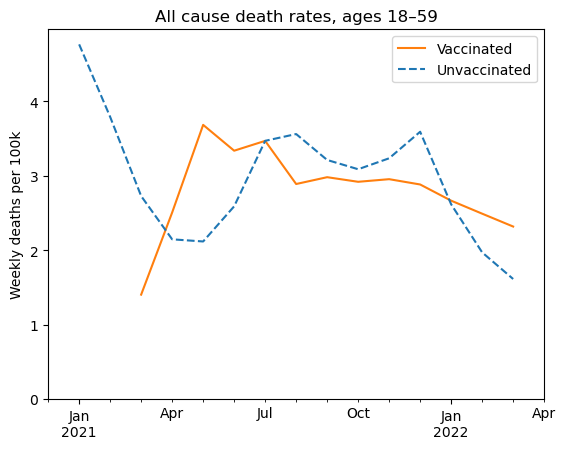

In [163]:
unvax_stat = ["Unvaccinated"]

vax_stat = [
    "Second dose, less than 21 days ago",
    "Second dose, at least 21 days ago",
    "Third dose or booster, less than 21 days ago",
    "Third dose or booster, at least 21 days ago",
]
# Unvaccinated
groups = ["18-39", "40-49", "50-59"]
seq = [table[group][unvax_stat] for group in groups]
t = pd.concat(seq, axis=1)
seq = [weight[group][unvax_stat] for group in groups]
w = pd.concat(seq, axis=1)
# make sure that weight is 0 where table is NaN
a = np.where(t.notna(), w, 0)
w = pd.DataFrame(a, index=w.index, columns=w.columns)
# normalize the weights rowwise
total = w.sum(axis=1)
weight_norm = w.divide(total, axis=0)
# compute the weighted sum of table
prod = t.fillna(0) * weight_norm
unvax = prod.sum(axis=1).replace(0, np.nan)

# Vaccinated
groups = ["18-39", "40-49", "50-59"]
seq = [table[group][vax_stat] for group in groups]
t = pd.concat(seq, axis=1)
seq = [weight[group][vax_stat] for group in groups]
w = pd.concat(seq, axis=1)
# make sure that weight is 0 where table is NaN
a = np.where(t.notna(), w, 0)
w = pd.DataFrame(a, index=w.index, columns=w.columns)
# normalize the weights rowwise
total = w.sum(axis=1)
weight_norm = w.divide(total, axis=0)
# compute the weighted sum of table
prod = t.fillna(0) * weight_norm
vax = prod.sum(axis=1).replace(0, np.nan)

vax.plot(color="C1", ls="-", label="Vaccinated")
unvax.plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause death rates, ages 18–59", ylim=[0.1, 4.6])

plt.legend(loc="upper right")

# set axes
high = max(max(unvax), max(vax))
start = pd.Timestamp("2020-12-15")
end = pd.Timestamp("2022-04-01")
ax = plt.gca()
ax.set(ylim=(0, high+0.2), xlim=(start, end))

Now, produce this plot for all separate age groups!

In [122]:
ax
#plt.gca().get_ylim()

NameError: name 'ax' is not defined

***

### Exercise 1 - solution

#### task 1 - solution

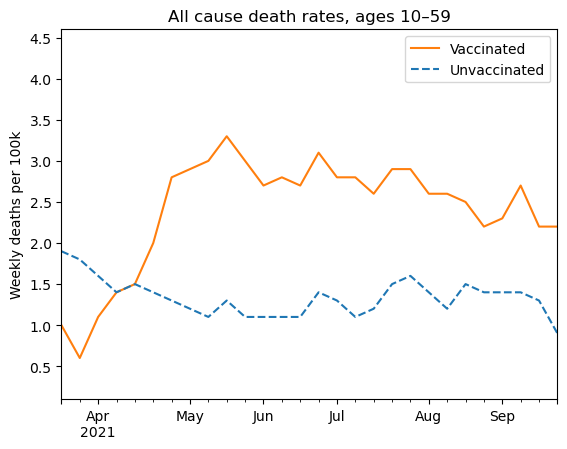

In [38]:
recent = table.index >= pd.Timestamp("2021-3-19")
table[recent]["Second dose", "10-59"].plot(color="C1", ls="-", label="Vaccinated")
table[recent]["Unvaccinated", "10-59"].plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause death rates, ages 10–59", ylim=[0.1, 4.6])

plt.legend(loc="upper right")


The lines show weekly death rates from all causes, per 100,000 people age 10-59, from March to September 2021. The solid line represents people who were fully vaccinated; the dashed line represents people who were unvaccinated.

#### task 2 - solution

There are two things wrong with the journalist's interpretation of the data:

1. He leaves out the time range that contradicts him; he also leaves out the age ranges that contradict him. By choosing one age group and time interval, he has cherry-picked data that support his conclusion and ignored data that don't. 

2. Second, because the data combine a wide range of ages, from 10 to 59, he has been fooled by Simpson's paradox.



#### task 3 - solution

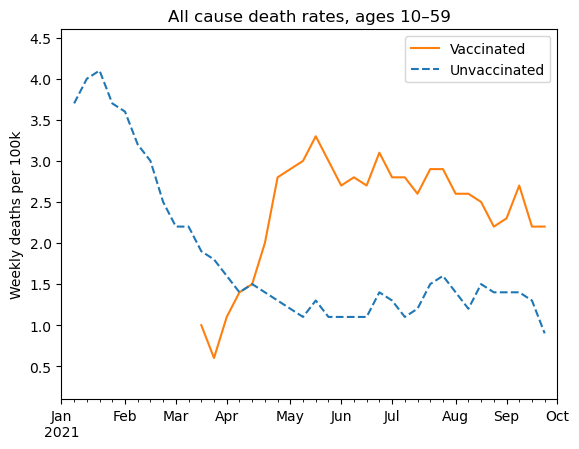

In [51]:
start = pd.Timestamp("2021-01-01")
end = pd.Timestamp("2021-09-30")
table["Second dose", "10-59"].plot(color="C1", ls="-", label="Vaccinated")
table["Unvaccinated", "10-59"].plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause death rates, ages 10–59", ylim=[0.1, 4.6], xlim=[start, end])

plt.legend(loc="upper right")


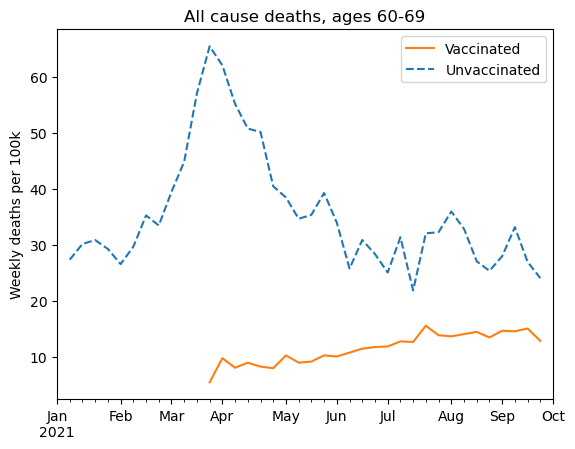

In [48]:
ages = "60-69"
table["Second dose", ages].plot(color="C1", ls="-", label="Vaccinated")
table["Unvaccinated", ages].plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause deaths, ages " + ages, xlim=[start, end])

plt.legend(loc="upper right")

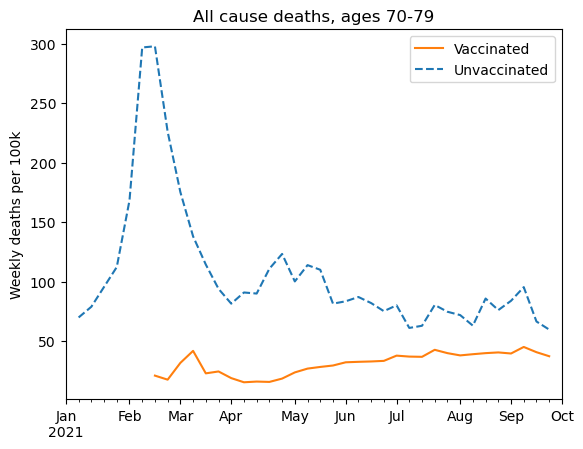

In [49]:
ages = "70-79"
table["Second dose", ages].plot(color="C1", ls="-", label="Vaccinated")
table["Unvaccinated", ages].plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause deaths, ages " + ages, xlim=[start, end])

plt.legend(loc="upper right")

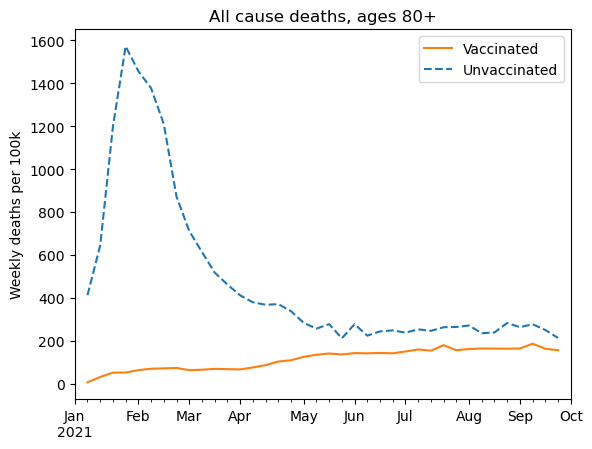

In [50]:
ages = "80+"
table["Second dose", ages].plot(color="C1", ls="-", label="Vaccinated")
table["Unvaccinated", ages].plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause deaths, ages " + ages, xlim=[start, end])

plt.legend(loc="upper right")

Overall death rates were "running well above normal" in January and February, when almost no one in the 10-59 age range had been vaccinated. Those deaths cannot have been caused by the vaccine. In fact, they were caused by a surge in the Alpha variant of COVID-19.
In all of the older age ranges, death rates were consistently lower among people who had been vaccinated, which is what we expect from a vaccine that has been shown in large clinical trials to be safe and effective. Notice that the $y$ axes are on different scales! Death rates are much higher in the older age groups.


#### task 4 - solution
Here, Simpson's Paradox is caused by two correlations:

1. Within this age group, older people were more likely to be vaccinated, and

2. older people were more likely to die of any cause, just because they are older.

#### task 5 - solution

In [71]:
sheet

,rate,pct_vax,pct_pop
10-14,8.8,0.0,5.9
15-19,23.1,26.7,5.5
20-24,39.1,59.6,6.2
25-29,48.4,59.7,6.8
30-34,66.9,63.3,6.7
35-39,97.3,63.3,6.6
40-44,143.3,74.6,6.0
45-49,219.6,80.5,6.6
50-54,321.5,85.6,7.0
55-59,478.2,88.2,6.6


In [72]:
rate[-1] / rate[0]

54.340909090909086

We see that the two correlations causing Simpson's Paradox are both strong: At the beginning of August, about 88% of people at the high end of this age range had been vaccinated, while none of the people at the low end had. And the death rate for people at the high end was 54 times higher than for people at the low end.

In [74]:
sheet["pct_pop"] /= sheet["pct_pop"].sum()
sheet["pct_vax_age"] = sheet["pct_pop"] * sheet["pct_vax"]
sheet["pct_vax_age"] /= sheet["pct_vax_age"].sum()
sheet["pct_novax_age"] = sheet["pct_pop"] * (100 - sheet["pct_vax"])
sheet["pct_novax_age"] /= sheet["pct_novax_age"].sum()
sheet

,rate,pct_vax,pct_pop,pct_vax_age,pct_novax_age,death_vax,death_novax
10-14,8.8,0.0,0.092332,0.000000,0.239297,0.000000,2.105810
15-19,23.1,26.7,0.086072,0.037419,0.163513,0.864387,3.777140
20-24,39.1,59.6,0.097027,0.094159,0.101592,3.681603,3.972229
25-29,48.4,59.7,0.106416,0.103444,0.111147,5.006692,5.379523
30-34,66.9,63.3,0.104851,0.108069,0.099730,7.229811,6.671929
35-39,97.3,63.3,0.103286,0.106456,0.098241,10.358164,9.558886
40-44,143.3,74.6,0.093897,0.114054,0.061812,16.344008,8.857590
45-49,219.6,80.5,0.103286,0.135382,0.052199,29.729969,11.462921
50-54,321.5,85.6,0.109546,0.152684,0.040883,49.087972,13.143951
55-59,478.2,88.2,0.103286,0.148332,0.031587,70.932358,15.104973


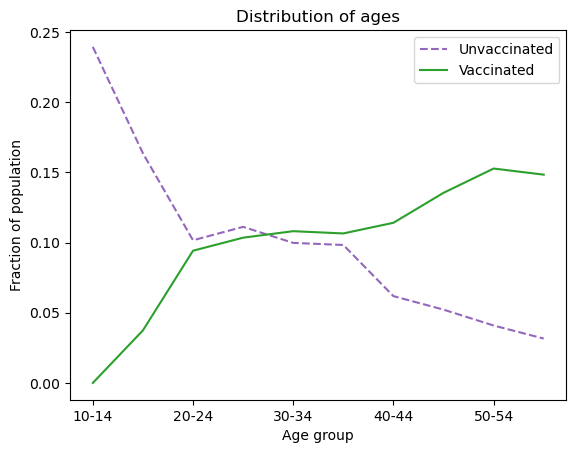

In [81]:
sheet["pct_novax_age"].plot(ls="--", color="C4", label="Unvaccinated")
sheet["pct_vax_age"].plot(color="C2", label="Vaccinated", xlabel="Age group", ylabel="Fraction of population", title="Distribution of ages")
plt.legend(loc="upper right")

At this point during the rollout of the vaccines, people who were vaccinated were more likely to be at the high end of the age range, and people who were unvaccinated were more likely to be at the low end. 

#### task 6 - solution

In [ ]:
sheet["death_vax"] = sheet["rate"] * sheet["pct_vax_age"]
sheet["death_novax"] = sheet["rate"] * sheet["pct_novax_age"]
sheet

In [63]:
sheet["death_vax"].sum(), sheet["death_novax"].sum()

(193.23496549826214, 80.03495027498823)

In [64]:
sheet["death_vax"].sum() / sheet["death_novax"].sum()

2.4143822771718533

The ratio of these two rates is about 2.4. So, prior to the pandemic, we would expect people with the age distribution of the vaccinated to die at a rate 2.4 times higher than people with the age distribution of the unvaccinated, just because they are older.
In reality, the pandemic increased the death rate in both groups, so the actual ratio was smaller, about 1.8. Thus, the results the journalist presented are not evidence that vaccines are harmful. As Morris concludes, they are "not unexpected, and can be fully explained by the Simpson's paradox artifact".

#### task 7 - solution

In [182]:
def make_plot(table, weight, groups):
    """Plot mortality for vaxed and unvaxed.

    table: DataFrame
    weight: DataFrame
    groups: list of string age groups
    """
    ages = ",".join(groups)
    # Unvaccinated
    seq = [table[group][unvax_stat] for group in groups]
    t = pd.concat(seq, axis=1)
    seq = [weight[group][unvax_stat] for group in groups]
    w = pd.concat(seq, axis=1)
    # make sure that weight is 0 where table is NaN
    a = np.where(t.notna(), w, 0)
    w = pd.DataFrame(a, index=w.index, columns=w.columns)
    # normalize the weights rowwise
    total = w.sum(axis=1)
    weight_norm = w.divide(total, axis=0)
    # compute the weighted sum of table
    prod = t.fillna(0) * weight_norm
    unvax = prod.sum(axis=1).replace(0, np.nan)

    # Vaccinated
    seq = [table[group][vax_stat] for group in groups]
    t = pd.concat(seq, axis=1)
    seq = [weight[group][vax_stat] for group in groups]
    w = pd.concat(seq, axis=1)
    # make sure that weight is 0 where table is NaN
    a = np.where(t.notna(), w, 0)
    w = pd.DataFrame(a, index=w.index, columns=w.columns)
    # normalize the weights rowwise
    total = w.sum(axis=1)
    weight_norm = w.divide(total, axis=0)
    # compute the weighted sum of table
    prod = t.fillna(0) * weight_norm
    vax = prod.sum(axis=1).replace(0, np.nan)

    vax.plot(color="C1", ls="-", label="Vaccinated")
    unvax.plot(color="C0", ls="--", label="Unvaccinated", xlabel="", ylabel="Weekly deaths per 100k", title="All cause death rates, ages "+ages, ylim=[0.1, 4.6])

    plt.legend(loc="upper right")

    # set axes
    high = max(max(unvax), max(vax))
    start = pd.Timestamp("2020-12-15")
    end = pd.Timestamp("2022-04-01")
    ax = plt.gca()
    ax.set(ylim=(0, high), xlim=(start, end))


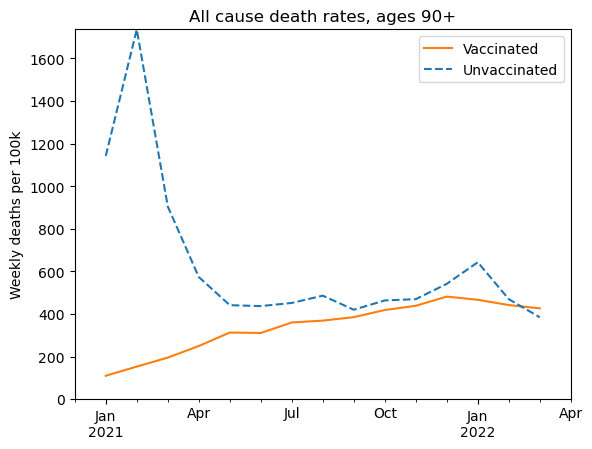

In [183]:
make_plot(table, weight, groups=["90+"])

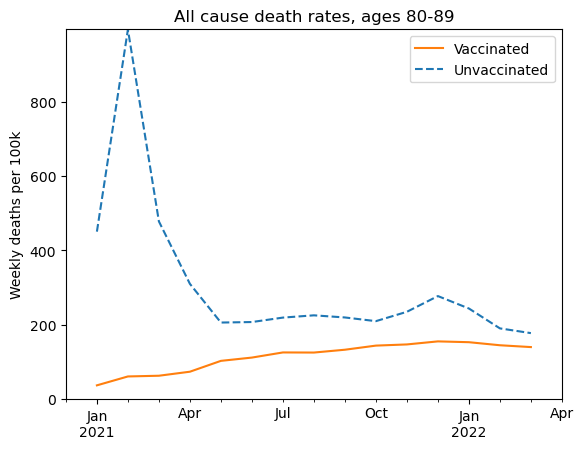

In [184]:
make_plot(table, weight, groups=["80-89"])

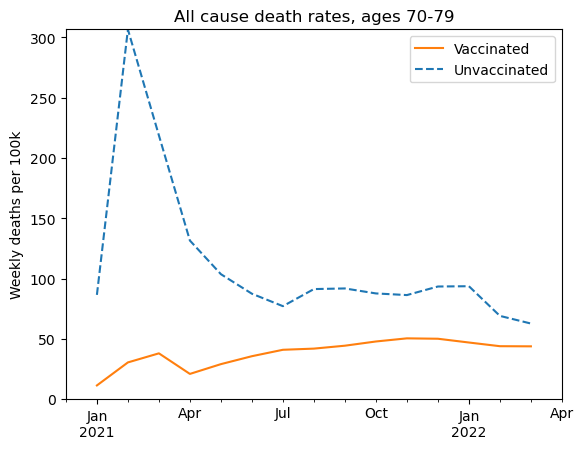

In [185]:
make_plot(table, weight, ["70-79"])

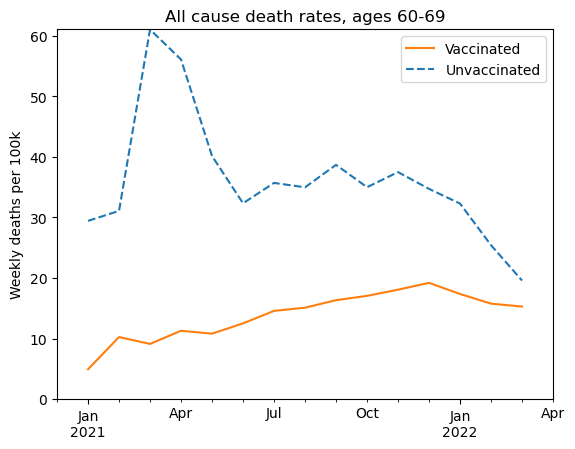

In [186]:
make_plot(table, weight, ["60-69"])

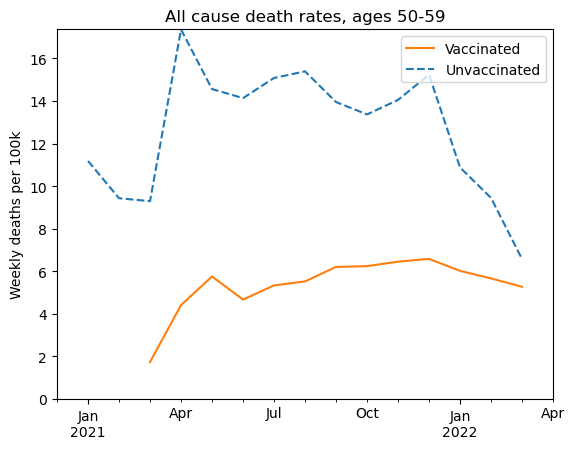

In [187]:
make_plot(table, weight, ["50-59"])

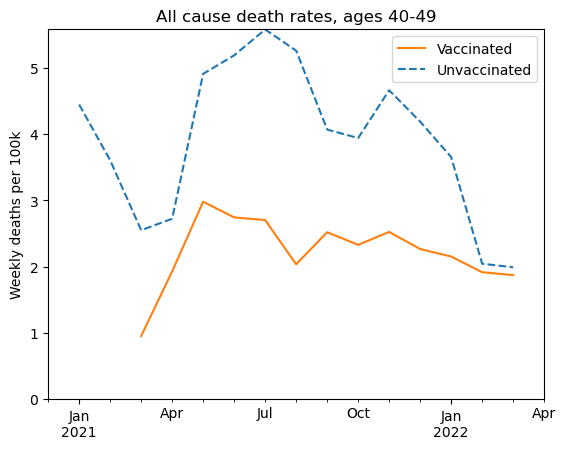

In [188]:
make_plot(table, weight, ["40-49"])

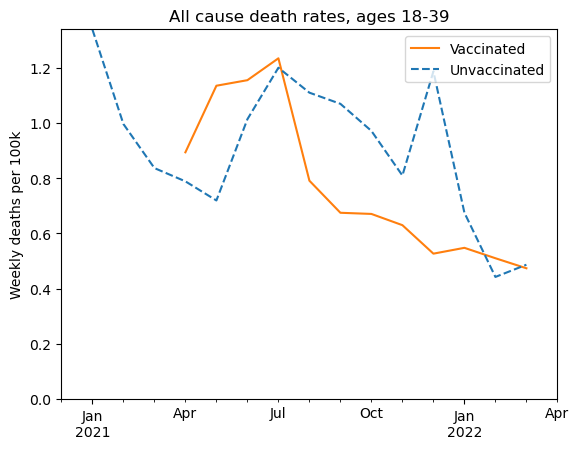

In [190]:
make_plot(table, weight, ["18-39"])

Let's look at the subgroups of people aged 18 to 59. Among people in their 50s, we see that the all-cause death rate was substantially higher among unvaccinated people over the entire interval from March 2021 to April 2022.
If we select people in their 40s, we see the same thing: death rates were higher for unvaccinated people over the entire interval. However, it is notable that death rates in both groups have declined since April or May 2021, and have nearly converged. Possible explanations include improved treatment for coronavirus disease and the decline of more lethal variants of the COVID virus. In the U.K., December 2021 is when the Delta variant was largely replaced by the Omicron variant, which is less deadly.

Finally, let's see what happened in the youngest group, people aged 18 to 39. In this age group, like the others, death rates are generally higher among unvaccinated people. There are a few months where the pattern is reversed, but we should not take it too seriously because:

* Death rates in this age group are very low, less than 1 per 100,000 per week, vaccinated or not.

* The apparent differences between the groups are even smaller, and might be the result of random variation.

Finally, this age group is still broad enough that the results are influenced by Simpson's paradox. The vaccinated people in this group were older than the unvaccinated, and the older people in this group were about 10 times more likely to die, just because of their age.

In summary, the excess mortality among vaccinated people in 2021 is entirely explained by Simpson's paradox. If we break the dataset into appropriate age groups, we see that death rates were higher among the unvaccinated in all age groups over the entire time from the rollout of the vaccine to the present. And we can conclude that the vaccine saved many lives.

***

### Exercise 2
In your own words, describe the Fundamental Problem of Causal Inference! 


***

### Exercise 2 - solution
The causal effect is the difference between two potential outcomes. Ex ante, they exist as a set of possibilities. However, after the treatment only one of these outcomes (the "factual") can be observed. We will never know what would have happened ("the counterfactual"). The switching equation determines the observable outcome as a function of potential outcomes:
<br></br> 
\begin{align}
Y_{i} = Y_{i}^{1}T_{i} + Y_{i}^{0}(1-T_{i})
\end{align}
<br>
But the causal effect is calculated as follows, where only one of the potential outcomes is observable according to the switching equation:
<br></br>
\begin{align}
\delta_{i} = Y_{i}^{1} - Y_{i}^{0}
\end{align}
<br>
Here is an example to visualize the problem:
<br> 
<img src="potential outcomes.png" alt="Fundamental Problem of Causal Inference" style="width: 550px;"/>
<br> 
    These are the observables: the treatment $T$ and the outcome $Y$. The counterfactuals remain unknown. We can not calculate a causal effect without making certain assumptions and using suitable techniques.
<br><br/>

***

### Exercise 3 
1. Describe the following 3 DAGs and their implications using e.g. "confounder", "collider", "backdoor path"!

<img src="confounder.png" alt="Confounder" style="width: 350px;"/>
<img src="unobserved confounder.png" alt="Unobserved Confounder" style="width: 350px;"/>
<img src="collider.png" alt="Collider" style="width: 350px;"/>
<br> 

2. The following DAG combines the variables female ($F$), discrimination ($D$), occupation ($O$), ability ($A$) and earnings ($Y$). Explain the researcher's model expressed by this DAG!

<img src="discrimination.png" alt="Discrimination" style="width: 350px;"/>
<br>

3. Imagine now, we were not interested in the total effect of discrimination on earnings but wanted to control for occupation. Google, for example, claimed that once occupation is taken into account, gender discrimination disappeares (https://www.theverge.com/2022/6/12/23164678/google-pay-118-million-settle-gender-discrimination-lawsuit). What problem would arise if we controlled for occupation?

4. The following code generates data as suggested by the DAG (hard coded & borrowed from Scott Cunningham). Use this data to show how the discrimination effect apparently changes if we a) only look at the total effect of discrimination, b) control for occupation and thereby open a backdoor path, and c) close this backdoor path while still controlling for $O$.

5. In 2009 Megan Fox was voted the worst talented, but sexiest actress (https://www.reuters.com/article/idUSTRE5BR3J020091228/?type=entertainmentNews). How are talent and beauty related? Are they? Look at the code below (borrowed from Scott Cunningham & Gabriel Rossman)! Here, talent and beauty are independent, random draws from a standard normal distribution, assigned to 2500 individuals. Consider individuals whose combination (sum) of talent and beauty ranks in the top 85th percentile as moviestars! Show only these moviestars in a scatterplot (talent vs beauty)! Make a judgement regarding the association of talent and beauty! How does the sample selection influence your perception?
***


In [54]:
## task 4

import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
from stargazer.stargazer import Stargazer

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 


In [ ]:
## task 5

import numpy as np 
import pandas as pd 
import plotnine as p
import statsmodels.api as sm 

moviestar = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
moviestar['score'] = moviestar['beauty'] + moviestar['talent']


### Exercise 3 - solution

#### task 1 - solution
In all DAGs $D$ is the treatment and $Y$ is the outcome. They are causally linked by an arrow pointing from $D$ to $Y$. 
<br> 
In the first DAG $X$ influences both, $D$ and $Y$. This means, $Y$ changes not only because of changes in $D$ but also due to changes in $X$. And $D$ also depends on $X$. Hence, $X$ is a confounder which establishes spurious correlation and causes a bias. It allows for an open backdoor path. We can only separate the causal relationship we are interested in ($D$ -> $Y$) if we control for $X$ and thereby close the backdoor path.
<br> 
The second DAG describes a very similar situation, with the only difference being that the confounder $U$ is unobserved. The dotted arrows indicate this. $U$ might simply be missing in the dataset. While we know it has an effect on $D$ and $Y$ we can not control for it. Other ways are necessary to make valid causal inference. 
<br> 
The third DAG "only" differs in the direction of the arrows, however, this causes a completely different problem. Here, $X$ is called a collider. As such it does no harm to the identification process since it keeps a backdoor path closed. Only if we control for $X$, we open the backdoor path and link $D$ and $Y$ through a second path while before we only had one path, the causal path of interest. 
<br>

#### task 2 - solution
The researcher believes that there is gender discrimination in the labor-markets. Being female leads to discrimination and different wages. He further assumes that the discrimination not only affects earnings directly but also through mediation by occupational sorting ("women hold less attractive and thereby worse paying jobs"). Ability, the popular unobserved variable in labor-market research, is considered as well, affecting both, occupation and earnings. $O$ is a collider, so the backdoor criterion is fulfilled.
<br>

#### task 3 - solution
$O$ is a collider. By controlling for $O$ we open a backdoor path and thereby create a bias. We say that $O$ is a bad control.
***

#### task 4 - solution

In [53]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm  
from stargazer.stargazer import Stargazer

tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 

lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()

st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

#### task 5 - solution

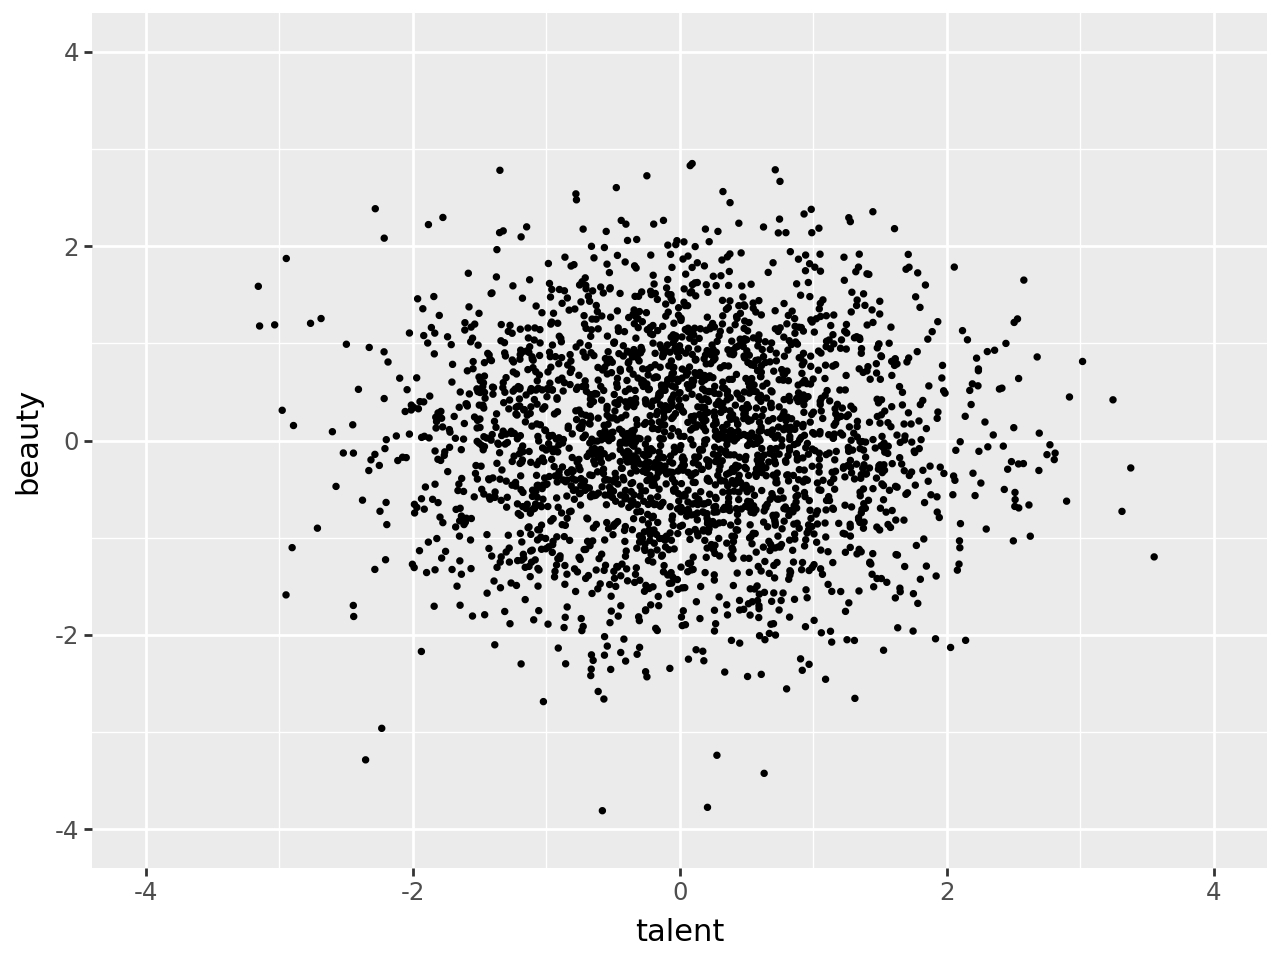

In [75]:
import numpy as np 
import pandas as pd 
import plotnine as p
import statsmodels.api as sm 

moviestar = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
moviestar['score'] = moviestar['beauty'] + moviestar['talent']
moviestar['c85'] = np.percentile(moviestar['score'], q=85)
moviestar['star'] = 0
moviestar.loc[moviestar['score']>moviestar['c85'], 'star'] = 1

lm = sm.OLS.from_formula('beauty ~ talent', data=moviestar).fit()

p.ggplot(moviestar, p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)



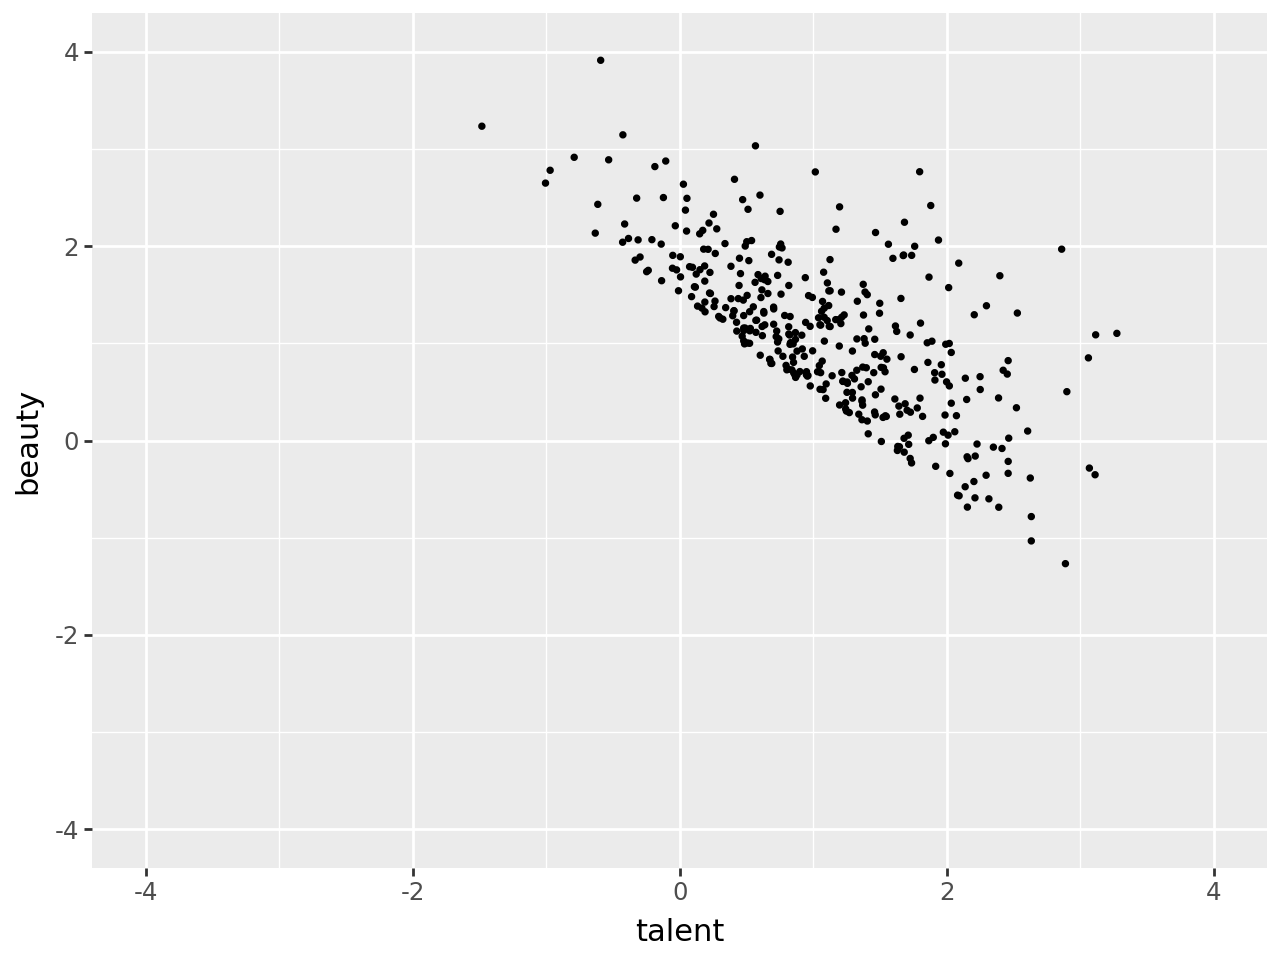

In [59]:
p.ggplot(moviestar[moviestar.star==1], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)


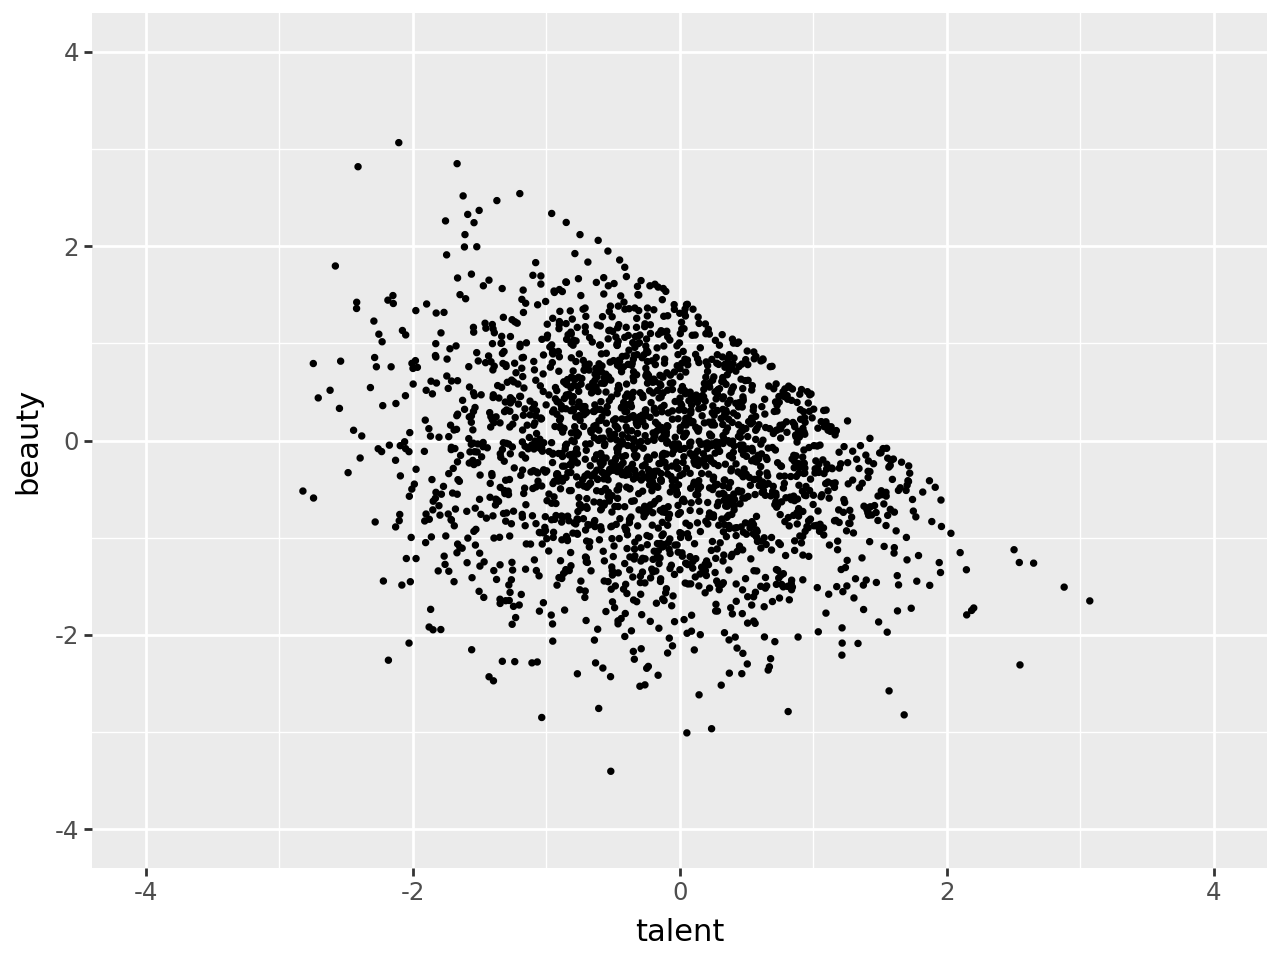

In [60]:
p.ggplot(moviestar[moviestar.star==0], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)


<br> 
<img src="moviestar.png" alt="Sample Selection and Collider Bias" style="width: 550px;"/>
<br> 
Again, a DAG helps us to visualize the problem. Both variables, "talent" and "beauty", influence the variable "moviestar". Hence, "moviestar" is a collider. The problem arises if "moviestar" is conditioned upon. By selecting only a particular part of the population, namely the moviestars, we introduce spurious correlation as seen in the scatterplot. Lifting the condition reveals that in fact, "talent" and "beauty" are independent. 

***

### References
***

[1] Cunningham, S. (2021). Causal Inference: The Mixtape. Yale University Press. https://doi.org/10.2307/j.ctv1c29t27

[2] Garreta, R., & Moncecchi, G. (2013). Learning scikit-learn: machine learning in python. Packt Publishing Ltd.

[3] Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".

[4] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.
